Open the File in the beginnning

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('cleanData_divide.csv') # from Eddie 
df.head(20)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER,FL_NUM,Route,ORIGIN,DEST,...,OP_REVENUES,fare,carrier_lg,large_ms,fare_lg,HUBS,ARR_DELAY_GROUP,DISTANCE_CAT,ORIGIN_STATE,AVG_FARE_MILE
0,2018,2,6,5,2,YX,6135,3473.0,LGA,DCA,...,330843.99,231.05,DL,0.4146,237.55,0,-1,0,NY,1.079673
1,2018,3,7,24,2,YV,5897,5016.0,PHX,LBB,...,165982.27,234.96,AA,0.5686,242.31,0,9,0,AZ,0.399592
2,2019,1,2,16,6,DL,1790,226.0,ATL,ICT,...,7691968.00,247.92,DL,0.8282,253.09,0,0,0,GA,0.317033
3,2018,1,3,21,3,OO,3115,4599.0,ORD,ICT,...,613381.00,256.64,UA,0.4836,270.66,0,-2,0,IL,0.436463
4,2018,4,12,3,1,AA,30,4613.0,ORD,LGA,...,7748780.65,194.12,UA,0.3583,217.29,1,0,0,IL,0.264829
5,2019,1,2,16,6,DL,1535,273.0,ATL,PIT,...,7691968.00,272.77,DL,0.5500,286.66,0,-1,0,GA,0.518574
6,2019,2,5,31,5,OO,3715,307.0,ATL,TRI,...,730636.70,208.36,DL,0.9750,208.85,0,-1,0,GA,0.917885
7,2018,2,5,20,7,OH,5299,1106.0,CLT,GNV,...,434.13,309.66,AA,0.9313,303.24,0,-1,0,NC,0.798093
8,2018,3,7,27,5,UA,301,3873.0,MFR,DEN,...,6762278.66,244.51,UA,0.8073,249.28,1,-2,0,OR,0.253641
9,2018,3,7,17,2,DL,2476,1096.0,CLT,DTW,...,8240538.00,249.69,DL,0.5018,247.60,1,-1,0,NC,0.499380


See the size of the data

In [3]:
df.shape # (500000,25)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562743 entries, 0 to 5562742
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   YEAR             int64  
 1   QUARTER          int64  
 2   MONTH            int64  
 3   DAY_OF_MONTH     int64  
 4   DAY_OF_WEEK      int64  
 5   CARRIER          object 
 6   FL_NUM           int64  
 7   Route            float64
 8   ORIGIN           object 
 9   DEST             object 
 10  DEST_STATE       object 
 11  CRS_DEP_TIME     int64  
 12  DISTANCE         int64  
 13  PASSENGERS       int64  
 14  EMPFTE           int64  
 15  NET_INCOME       float64
 16  OP_REVENUES      float64
 17  fare             float64
 18  carrier_lg       object 
 19  large_ms         float64
 20  fare_lg          float64
 21  HUBS             int64  
 22  ARR_DELAY_GROUP  int64  
 23  DISTANCE_CAT     int64  
 24  ORIGIN_STATE     object 
 25  AVG_FARE_MILE    float64
dtypes: float64(7), int64(13), object(6)
memory

In [4]:
df_onehot = df.copy()
df_onehot=df_onehot.drop(columns=['ARR_DELAY_GROUP'])
df_onehot=df_onehot.drop(columns=['ORIGIN'])
df_onehot=df_onehot.drop(columns=['DEST'])
#df_onehot=df_onehot.drop(columns=['ORIGIN_STATE'])
#df_onehot=df_onehot.drop(columns=['DEST_STATE'])

df_onehot = pd.get_dummies(df_onehot, columns=['carrier_lg'], prefix = ['carrier_lg'])
df_onehot = pd.get_dummies(df_onehot, columns=['CARRIER'], prefix = ['CARRIER'])
df_onehot = pd.get_dummies(df_onehot, columns=['YEAR'], prefix = ['YEAR'])
df_onehot = pd.get_dummies(df_onehot, columns=['QUARTER'], prefix = ['QUARTER'])
df_onehot = pd.get_dummies(df_onehot, columns=['MONTH'], prefix = ['MONTH'])
df_onehot = pd.get_dummies(df_onehot, columns=['DEST_STATE'], prefix = ['DEST_STATE'])
df_onehot = pd.get_dummies(df_onehot, columns=['ORIGIN_STATE'], prefix = ['ORIGIN_STATE'])
#df_onehot= pd.get_dummies(df_onehot, columns=['DEST'], prefix = ['DEST'])
#df_onehot = pd.get_dummies(df_onehot, columns=['ORIGIN'], prefix = ['ORIGIN'])

#df_onehot.info()
# Skip flight number and route

X=df_onehot.iloc[: ,1:]
Original_X=X
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562743 entries, 0 to 5562742
Columns: 152 entries, DAY_OF_WEEK to ORIGIN_STATE_WY
dtypes: float64(7), int64(8), uint8(137)
memory usage: 1.3 GB


Print the input data of columns

In [5]:
for i  in range (len(Original_X.columns)):
    print (Original_X.columns[i])

DAY_OF_WEEK
FL_NUM
Route
CRS_DEP_TIME
DISTANCE
PASSENGERS
EMPFTE
NET_INCOME
OP_REVENUES
fare
large_ms
fare_lg
HUBS
DISTANCE_CAT
AVG_FARE_MILE
carrier_lg_AA
carrier_lg_AS
carrier_lg_B6
carrier_lg_DL
carrier_lg_F9
carrier_lg_G4
carrier_lg_NK
carrier_lg_SY
carrier_lg_UA
carrier_lg_WN
CARRIER_9E
CARRIER_AA
CARRIER_AS
CARRIER_B6
CARRIER_DL
CARRIER_EV
CARRIER_F9
CARRIER_G4
CARRIER_MQ
CARRIER_NK
CARRIER_OH
CARRIER_OO
CARRIER_UA
CARRIER_WN
CARRIER_YV
CARRIER_YX
YEAR_2018
YEAR_2019
QUARTER_1
QUARTER_2
QUARTER_3
QUARTER_4
MONTH_1
MONTH_2
MONTH_3
MONTH_4
MONTH_5
MONTH_6
MONTH_7
MONTH_8
MONTH_9
MONTH_10
MONTH_11
MONTH_12
DEST_STATE_AL
DEST_STATE_AR
DEST_STATE_AZ
DEST_STATE_CA
DEST_STATE_CO
DEST_STATE_CT
DEST_STATE_FL
DEST_STATE_GA
DEST_STATE_IA
DEST_STATE_ID
DEST_STATE_IL
DEST_STATE_IN
DEST_STATE_KS
DEST_STATE_KY
DEST_STATE_LA
DEST_STATE_MA
DEST_STATE_MD
DEST_STATE_ME
DEST_STATE_MI
DEST_STATE_MN
DEST_STATE_MO
DEST_STATE_MS
DEST_STATE_MT
DEST_STATE_NC
DEST_STATE_ND
DEST_STATE_NE
DEST_STATE_NH
DEST_

In [6]:
from sklearn import preprocessing
import numpy as np
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X)
X_train_minmax


array([[0.16666667, 0.77576831, 0.51952716, ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.7456684 , 0.75041149, ..., 0.        , 0.        ,
        0.        ],
       [0.83333333, 0.22625522, 0.03366751, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33333333, 0.10636145, 0.64776298, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.28822562, 0.59194972, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.23333755, 0.88867275, ..., 0.        , 0.        ,
        0.        ]])

In [7]:
X= pd.DataFrame(X_train_minmax)
X

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
0,0.166667,0.775768,0.519527,0.374826,0.055326,0.315791,0.030836,0.032536,0.036811,0.351612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.166667,0.745668,0.750411,0.788595,0.196086,0.014018,0.006616,0.034683,0.018465,0.359733,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.833333,0.226255,0.033668,0.475661,0.269100,0.087824,0.812498,0.487002,0.855969,0.386653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.393828,0.688014,0.513908,0.196086,0.050098,0.108974,0.053017,0.068252,0.404765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.003668,0.690109,0.687761,0.250659,0.443458,0.985660,0.441781,0.862292,0.274904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5562738,0.666667,0.563931,0.289391,0.652990,0.136620,0.033334,0.108206,0.081829,0.072751,0.454013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5562739,0.833333,0.151005,0.867275,0.038943,0.622507,0.253628,0.801102,0.580515,0.752512,0.340312,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5562740,0.333333,0.106361,0.647763,0.590403,0.258186,0.045635,0.044089,0.017322,0.085492,0.261341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5562741,0.500000,0.288226,0.591950,0.904033,0.947685,0.204661,0.994052,0.261855,0.161218,0.553922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Defie the y:
Could revise the following, 
I sperate y to 0 and 1 because want to do the regression work 

In [8]:

y = df[['ARR_DELAY_GROUP']]
num = y._get_numeric_data()
num[num <= 0] = 0 # No delay
num[num >0 ] = 1 # Has dealy
y

,ARR_DELAY_GROUP
0,0
1,1
2,0
3,0
4,0
...,...
5562738,0
5562739,0
5562740,0
5562741,0


In [9]:
y.describe()

,ARR_DELAY_GROUP
count,5.562743e+06
mean,1.928689e-01
std,3.945510e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


Here I want to compare three different models:  Ridge Regression, and Lasso Regression. I intend to compare their performance measured by AUROC. In Ridge Regression and Lasso Regression, there is a hyperparameter named  𝑎𝑙𝑝ℎ𝑎  which is the weight of regularization. For more information you can check the documentation of the functions. Since  𝑎𝑙𝑝ℎ𝑎  needs to be tuned, in each fold we perform an internal cross-validation to acquire the best value  𝑎𝑙𝑝ℎ𝑎  and then perform the final training using the obtained  𝑎𝑙𝑝ℎ𝑎 .

In [10]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

num_of_folds = 2
max_iter = 1e8

auc_dict               = {'log_reg': 0,  'ridge_reg': 0,  'lasso_reg': 0}
chosen_hyperparam_dict = {               'ridge_reg': [], 'lasso_reg': []}

skf=StratifiedKFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()

    log_regressor   = LogisticRegression(penalty='l2', max_iter = max_iter)
    log_regressor.fit(X_train, y_train)
    
    ridge_regressor = Ridge(max_iter = max_iter)
    ridge_regressor = GridSearchCV(estimator=ridge_regressor, param_grid={'alpha':[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}, cv= 6)
    ridge_regressor.fit(X_train, y_train)
    chosen_hyperparam_dict['ridge_reg'].append(ridge_regressor.best_params_['alpha'])
    
    lasso_regressor = Lasso(max_iter = max_iter)
    lasso_regressor = GridSearchCV(estimator=lasso_regressor, param_grid={'alpha':[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]}, cv= 6)
    lasso_regressor.fit(X_train, y_train)
    chosen_hyperparam_dict['lasso_reg'].append(lasso_regressor.best_params_['alpha'])
    
    log_pred   =   log_regressor.predict(X_test)
    ridge_pred = ridge_regressor.predict(X_test)
    lasso_pred = lasso_regressor.predict(X_test)
    
    auc_dict['log_reg']   += roc_auc_score(y_test, log_pred)/num_of_folds
    auc_dict['ridge_reg'] += roc_auc_score(y_test, ridge_pred)/num_of_folds
    auc_dict['lasso_reg'] += roc_auc_score(y_test, lasso_pred)/num_of_folds

In [11]:
print(ridge_regressor)

GridSearchCV(cv=6, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=100000000.0, normalize=False,
                             random_state=None, solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [12]:
def most_frequent(List): 
    return max(set(List), key = List.count)

In [13]:
for key in auc_dict:
    print (key, auc_dict[key])

log_reg 0.5002381729613942
ridge_reg 0.63136266637066
lasso_reg 0.6235384791853764


In [31]:
#Skip log_regression 
#log_regressor = LogisticRegression(penalty='l2', max_iter = max_iter)
#log_regressor.fit(X, y.values.ravel())

ridge_regressor = Ridge(alpha = most_frequent(chosen_hyperparam_dict['ridge_reg']),max_iter = max_iter)
ridge_regressor.fit(X, y.values.ravel())
    
lasso_regressor = Lasso(alpha = most_frequent(chosen_hyperparam_dict['lasso_reg']), max_iter = max_iter)
lasso_regressor.fit(X, y.values.ravel())

#print (log_regressor.coef_)
print (ridge_regressor.coef_)
#print (lasso_regressor.coef_)

[-1.05604494e-02  2.96796665e-02  1.24281738e-02  2.55174530e-01
 -1.73384945e-02  4.53784944e-02 -1.45645374e-01  1.40146613e-04
  2.46287405e-02  1.11144812e-02 -3.65454141e-02  2.27951487e-02
 -6.58592425e-03  0.00000000e+00 -4.57412116e-02  6.37419807e-03
 -2.29861502e-03  7.18548291e-03  1.87243468e-04 -1.01673560e-03
 -9.23811043e-03 -1.01535168e-02  1.11048077e-02  1.83291604e-03
 -3.97766269e-03 -4.36265824e-02  1.02901513e-01 -1.72649213e-02
  3.96166947e-02  1.15922214e-02 -3.72877085e-02  5.59943424e-02
  2.36814568e-02 -3.24999129e-02 -4.06580470e-02 -2.88963356e-02
 -1.89204897e-02  4.45602603e-02  4.10531395e-02 -2.98038813e-02
 -7.04417558e-02 -1.07254672e-02  1.07254672e-02 -7.72037704e-03
  8.83374298e-04  1.25438144e-02 -5.70680425e-03 -7.53917693e-03
  2.46367301e-02 -2.48179250e-02 -2.77408083e-02 -6.10444073e-03
  3.47286432e-02  2.21083590e-02  2.66898373e-02 -3.62543760e-02
 -1.64708374e-02  1.29010711e-02 -2.13702388e-03 -1.93121898e-03
 -2.59545569e-03  7.71771

Draw

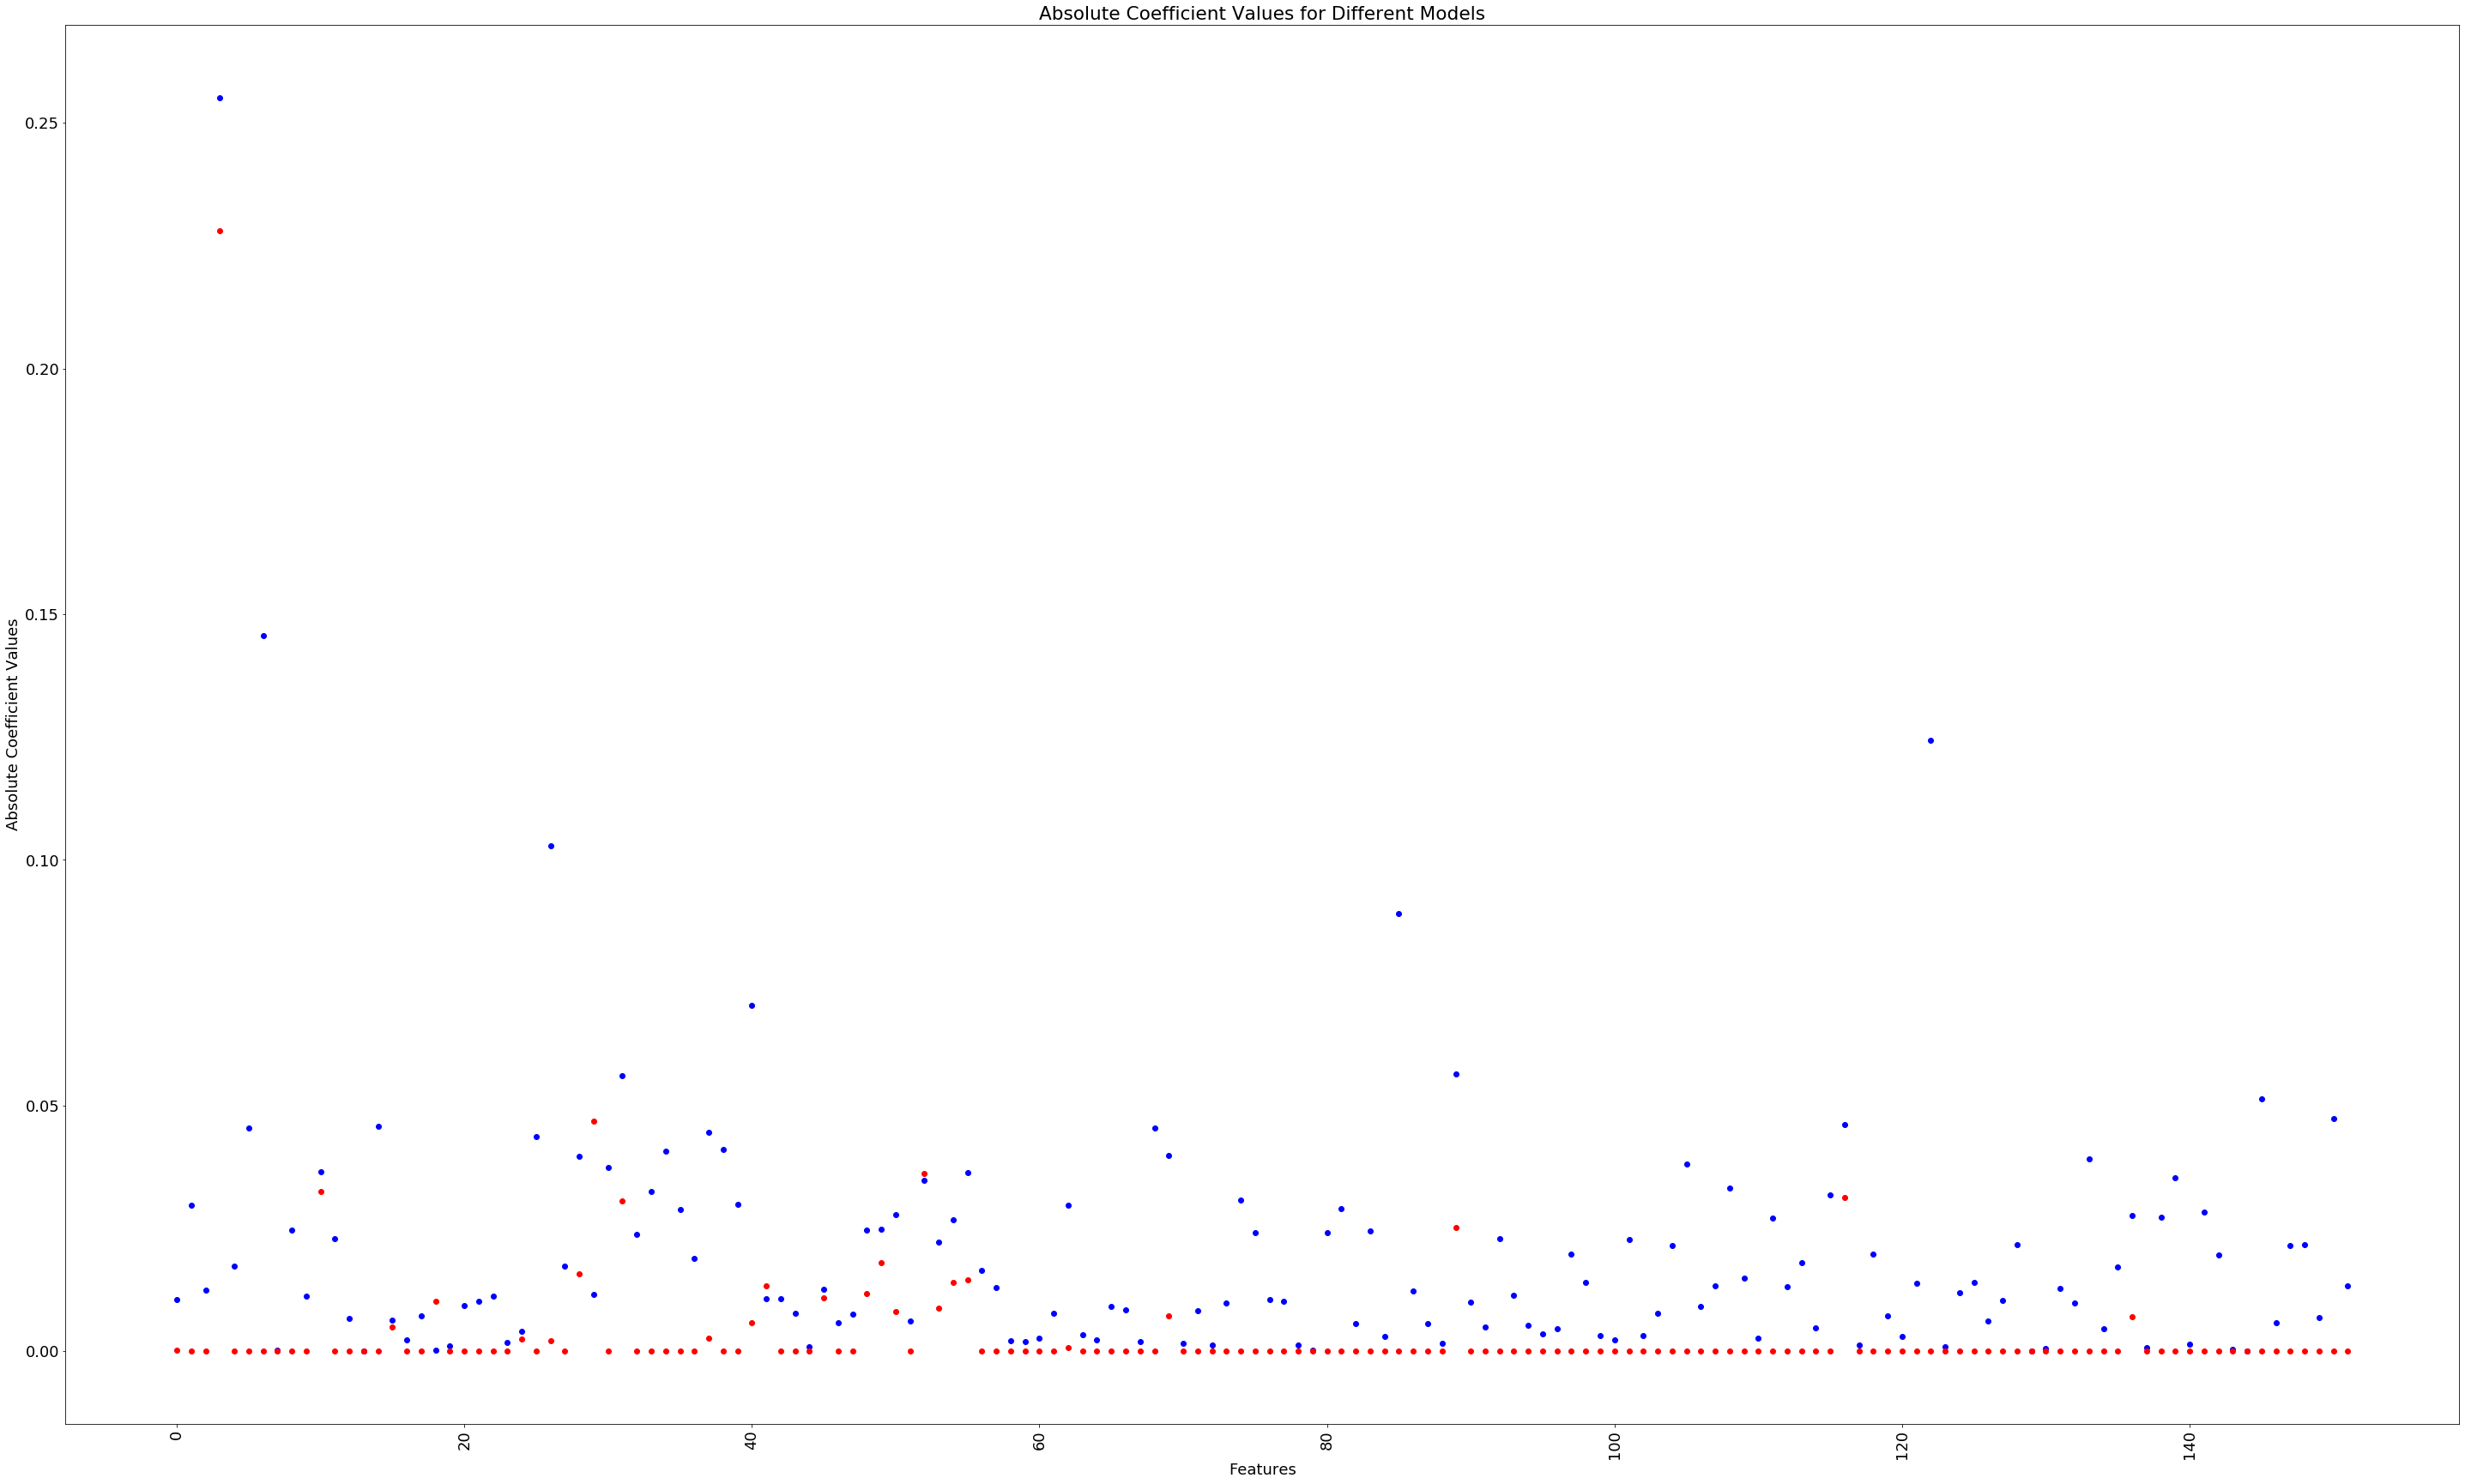

In [15]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import numpy as np

plt.figure(figsize = (50,30)) 

#plt.scatter(X.columns, np.abs(log_regressor.coef_), color='black', label = "logistic regression")
plt.scatter(X.columns, np.abs(ridge_regressor.coef_), color='blue', label = "ridge regression")
plt.scatter(X.columns, np.abs(lasso_regressor.coef_), color='red', label = "lasso regression")
#plt.plot(range(1, len(accuracy)+1), accuracy, linewidth=0.2, color = 'black')

plt.title('Absolute Coefficient Values for Different Models')
plt.xlabel('Features')
#plt.xticks(range(1, len(k_vals)+1), k_vals)
plt.ylabel('Absolute Coefficient Values')
plt.xticks(rotation='vertical')
plt.show()

Pick the features, which are positive influence for the delay

In [67]:
#max(ridge_regressor.coef_)
#ridge_regressor.coef_.argmax()
draw_x=[]
draw_y=[]
draw_y_lasso=[]
for i in range(len(ridge_regressor.coef_)):
    if ridge_regressor.coef_[i]>0.03:  # > 0.1 , you could define by yourself
        draw_x.append(Original_X.columns[i])
        draw_y.append(ridge_regressor.coef_[i])
        draw_y_lasso.append(lasso_regressor.coef_[i])
        print (Original_X.columns[i])
        print (ridge_regressor.coef_[i])
print(len(draw_y))
print(len(draw_y_lasso))

CRS_DEP_TIME
0.25517452983496663
PASSENGERS
0.045378494393473884
CARRIER_AA
0.10290151334576092
CARRIER_B6
0.03961669471626362
CARRIER_F9
0.055994342376778444
CARRIER_UA
0.044560260334346416
CARRIER_WN
0.04105313949124672
MONTH_6
0.03472864322315485
DEST_STATE_IL
0.039882897125727415
DEST_STATE_MA
0.030666120786831147
DEST_STATE_NY
0.056470126270201274
ORIGIN_STATE_0
0.038072376537625935
ORIGIN_STATE_IL
0.04608435424610545
ORIGIN_STATE_MD
0.12424374709315666
ORIGIN_STATE_NJ
0.03916155939474902
ORIGIN_STATE_WV
0.0472749906281064
16
16


Pick the features, which are negative influence for the delay

In [69]:
for i in range(len(ridge_regressor.coef_)):
    if ridge_regressor.coef_[i]<=-0.1:
        draw_x.append(Original_X.columns[i])
        draw_y.append(abs(ridge_regressor.coef_[i]))
        draw_y_lasso.append(abs(lasso_regressor.coef_[i]))
        print (Original_X.columns[i])
        print (ridge_regressor.coef_[i])        
        

EMPFTE
-0.14564537426322896


Pick the features, which are nearly no reationship with the delay

In [28]:

for i in range(len(ridge_regressor.coef_)):
    if -0.001<ridge_regressor.coef_[i]<0.001:
        print (Original_X.columns[i])
        print (ridge_regressor.coef_[i])        
min(abs(ridge_regressor.coef_))

NET_INCOME
0.0001401466125977508
DISTANCE_CAT
0.0
carrier_lg_DL
0.00018724346780438767
QUARTER_2
0.0008833742975218388
DEST_STATE_MO
0.00016363567200124832
ORIGIN_STATE_ME
0.0008128464375687864
ORIGIN_STATE_NC
3.5443111536186245e-05
ORIGIN_STATE_ND
-0.0005594042999783225
ORIGIN_STATE_OH
0.000743544407094856
ORIGIN_STATE_TN
-0.00028076635702544344
ORIGIN_STATE_TX
-4.630788229513994e-05


-0.14564537426322896

In [64]:
draw_x_lasso=[]
draw_y_lasso=[]
for i in range(len(ridge_regressor.coef_)):
    if lasso_regressor.coef_[i]>0.02:  # > 0.1 , you could define by yourself
        draw_x.append(Original_X.columns[i])
        draw_y.append(lasso_regressor.coef_[i])
        print (Original_X.columns[i])
        print (lasso_regressor.coef_[i])


CRS_DEP_TIME
0.22806139508640064
CARRIER_F9
0.03055632157430572
MONTH_6
0.036116503340437575
DEST_STATE_NY
0.02511330086185494
ORIGIN_STATE_IL
0.03119469680147723


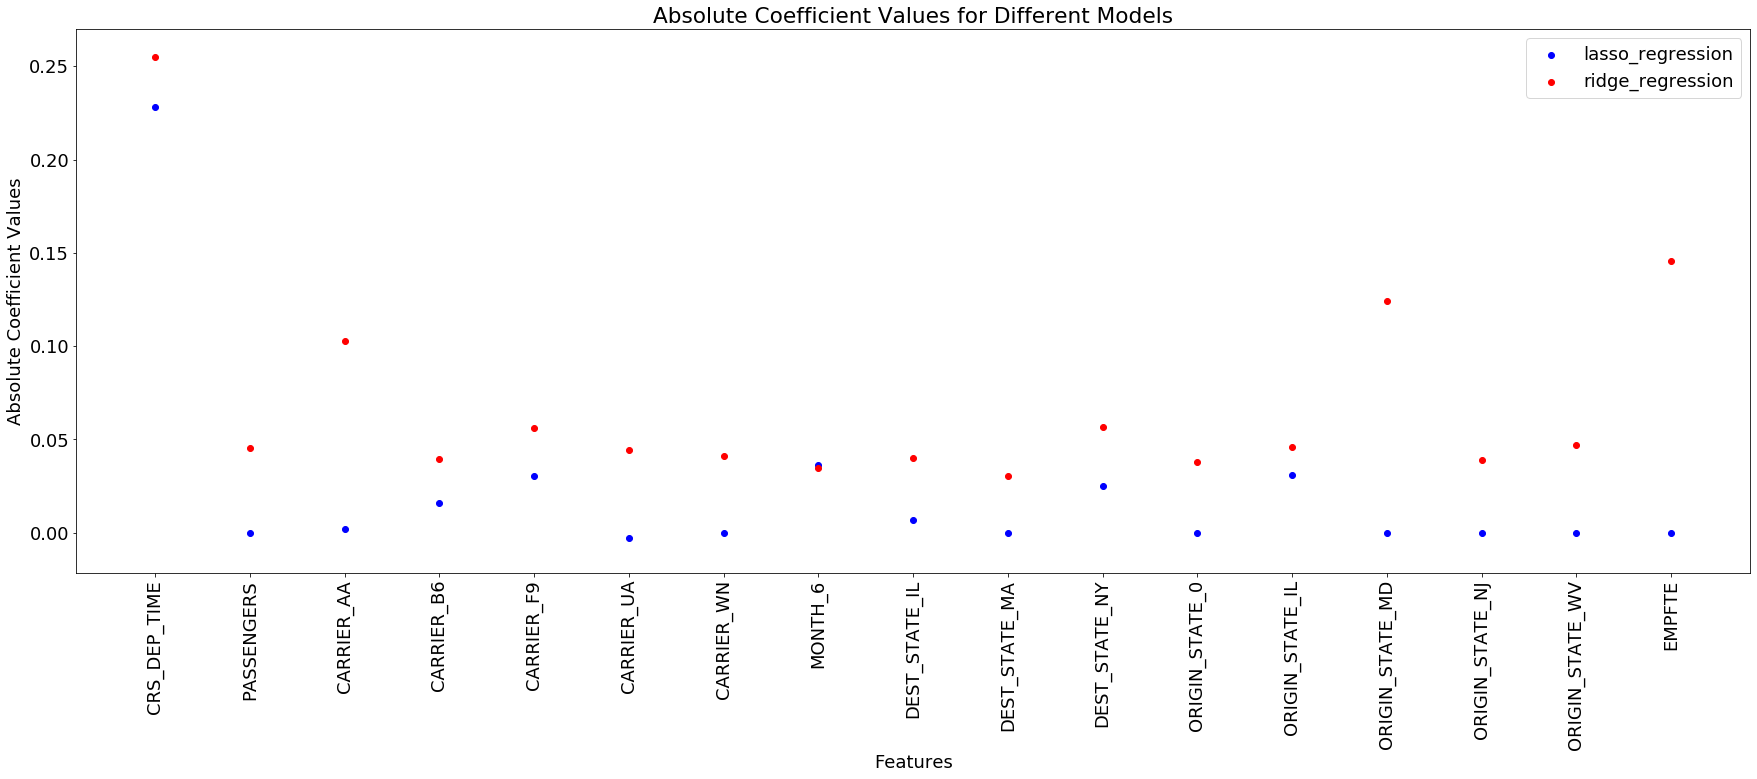

In [70]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import numpy as np

plt.figure(figsize = (30,10)) 

plt.scatter( draw_x,draw_y_lasso, color='blue', label = "lasso_regression")
plt.scatter( draw_x,draw_y, color='red', label = "ridge_regression")
#plt.plot(range(1, len(accuracy)+1), accuracy, linewidth=0.2, color = 'black')

plt.title('Absolute Coefficient Values for Different Models')
plt.xlabel('Features')
#plt.xticks(range(1, len(k_vals)+1), k_vals)
plt.ylabel('Absolute Coefficient Values')
plt.xticks(rotation='vertical')
plt.legend(loc='upper right')
plt.show()